In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/luis/Desktop/neovantas/Exam_music_streaming_app.csv',sep=';')

In [3]:
df['Proportion_popular_songs'] = pd.to_numeric(df.Proportion_popular_songs,errors='coerce')
df = df.dropna()

In [4]:
X = df.drop(['User_id','Premium_upgrade'],axis=1)

In [5]:
cols = X.columns.tolist()

In [6]:
from sklearn import preprocessing

In [7]:
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

In [8]:
X_norm = pd.DataFrame(np_scaled,columns=cols)
X_norm.head()

,Active_days,Songs_per_day,Music_genres_per_day,Numer_devices,Proportion_working_time,Searches_per_day,Proportion_popular_songs,NORTHAMERICA,EU,ASIA
0,0.745810,0.228070,0.428571,0.666667,0.000000,0.0,0.085928,1.0,0.0,0.0
1,0.675978,0.245614,0.571429,0.166667,0.000000,0.0,0.075523,1.0,0.0,0.0
2,0.740223,0.219298,0.428571,0.333333,0.568285,0.4,0.047349,1.0,0.0,0.0
3,0.245810,0.070175,0.142857,0.000000,0.000000,0.1,0.052696,0.0,0.0,1.0
4,0.628492,0.526316,0.714286,0.333333,0.000000,1.0,0.001429,0.0,0.0,1.0


In [9]:
import numpy as np

In [10]:
mean_vec = np.mean(X_norm, axis=0)
cov_mat = np.cov(X_norm.T)

In [11]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
#print('Eigenvectors \n%s' %eig_vecs)
#print('\nEigenvalues \n%s' %eig_vals)

In [12]:
# create a list of tuples of the type (eigenvalue,eigenvector)
eig_pairs = [(np.abs(eig_vals[i]),eig_vecs.T[i]) for i in range(len(eig_vals))]
eig_pairs = sorted(eig_pairs, key=lambda x: x[0], reverse =True)
print('Eigenvalues in descending order:')
for pair in eig_pairs:
    print(pair[0])

Eigenvalues in descending order:
0.113683208697
0.0911062946464
0.0505386831357
0.0434501948738
0.0362703168009
0.033646905616
0.0319220168029
0.026521041745
0.00471542421919
0.00188845059068


In [13]:
total_vals = sum(eig_vals)

individual_contribution= []
for pair in eig_pairs:
    pepe = 100*(pair[0]/total_vals)
    individual_contribution.append(pepe)
    
cumulative_contribution = []
for i in range(len(eig_pairs)):
    pepe = sum(individual_contribution[:i+1])
    cumulative_contribution.append(pepe)

In [14]:
cumulative_contribution

[26.209836242896177,
 47.214530698216059,
 58.866300771403502,
 68.883809121306413,
 77.24598568833342,
 85.003330826496281,
 92.363000231841326,
 98.47746664332135,
 99.564614851201398,
 100.0]

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

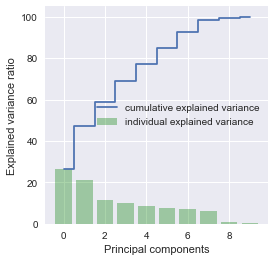

In [16]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(4, 4))
plt.bar(range(len(cumulative_contribution)), individual_contribution, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(cumulative_contribution)), cumulative_contribution, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [17]:
y = df['Premium_upgrade'].values

In [18]:
y.shape

(4985,)

In [19]:
from sklearn.cross_validation import train_test_split

/Users/luis/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
# Let's use only 3 Principal Components
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train, X_test,y_train,y_test = train_test_split(X_norm,y,test_size = 0.5,random_state = 42)

In [21]:
X_train.shape

(2492, 10)

In [22]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [23]:
pca.explained_variance_ratio_

array([ 0.2661454 ,  0.20693628])

In [24]:
df_pca = pd.DataFrame(X_test)

In [25]:
df_pca['Premium_upgrade'] = y_test

In [26]:
df_pca.sample(7)

,0,1,Premium_upgrade
1812,-0.102829,-0.303366,0
206,-0.406571,-0.101472,0
1540,-0.400451,-0.160413,0
1957,-0.460132,-0.136316,0
545,0.505016,-0.408234,0
1157,-0.380892,0.108909,0
73,-0.203259,-0.008999,0


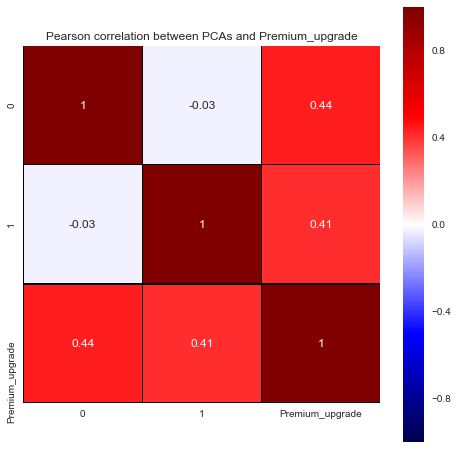

In [27]:
# correlation matrix in a nice visualization
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))
plt.title('Pearson correlation between PCAs and Premium_upgrade')
# Draw the heatmap using seaborn
sns.heatmap(df_pca.corr(),linewidths=0.25,vmax=1.0, square=True, cmap="seismic", linecolor='black', annot=True)
plt.show()

In [28]:
# Logistic Regression based on PCA

In [29]:
X_train.shape

(2492, 2)

In [30]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression()

In [31]:
clf_lr = LogisticRegression() 
clf_lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import confusion_matrix

In [33]:
accuracy_score(clf_lr.predict(X_test),y_test)

0.93662254312073812

In [34]:
precision_score(clf_lr.predict(X_test),y_test)

0.5985130111524164

In [35]:
recall_score(clf_lr.predict(X_test),y_test)

0.76303317535545023

In [36]:
dmat = confusion_matrix(clf_lr.predict(X_test),y_test)

In [37]:
dmat

array([[2174,  108],
       [  50,  161]])

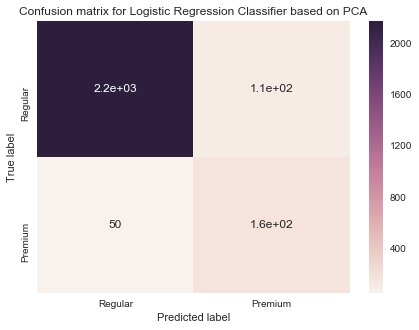

In [38]:
import seaborn as sns
plt.figure(figsize=(7,5))
dfmat = pd.DataFrame(dmat,index = ["Regular","Premium"],
                  columns = ["Regular","Premium"])
sns.heatmap(dfmat,annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for Logistic Regression Classifier based on PCA')
plt.show()

0.966897114279


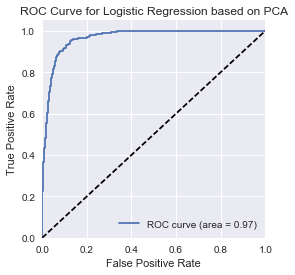

In [39]:
# we check the performance of the algorithm using the area below the ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

clf_lr.fit(X_train, y_train)
 
# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(y_test, clf_lr.predict_proba(X_test)[:,1])
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print(roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure(figsize=(4,4))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression based on PCA')
plt.legend(loc="lower right")
plt.show()

In [43]:
X_test

array([[ 0.5298279 , -0.31915692],
       [ 0.52019795, -0.09979288],
       [-0.46012778, -0.11446258],
       ..., 
       [-0.20757527,  0.06922101],
       [-0.28684194, -0.13279927],
       [ 0.54558178,  0.75449432]])

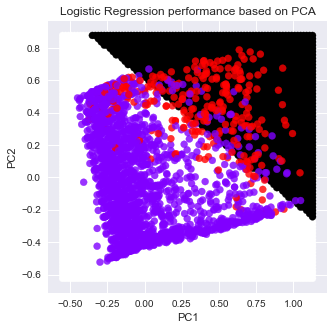

In [67]:
# comparing the prediction of the algorithm with the actual data in a grid
h = .02
x_min, x_max = X_test[:, 1].min() - 0.1, X_test[:, 1].max() + .1
y_min, y_max = X_test[:, 0].min() - .1, X_test[:, 0].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf_lr.predict(np.c_[yy.ravel(), xx.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(5,5))
plt.scatter(xx, yy,c=Z)
plt.scatter(X_test[:,1],X_test[:,0],c=y_test,cmap="rainbow",alpha=0.8)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Logistic Regression performance based on PCA')
plt.show()

In [52]:
# XGBOOST 

In [53]:
from xgboost import XGBClassifier

In [54]:
clf_xgb = XGBClassifier()

In [55]:
clf_xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [56]:
X_train.shape

(2492, 2)

In [57]:
print('accuracy score = '+str(accuracy_score(clf_xgb.predict(X_test),y_test)))
print('precision score = '+str(precision_score(clf_xgb.predict(X_test),y_test)))
print('recall score = '+str(recall_score(clf_xgb.predict(X_test),y_test)))

accuracy score = 0.936622543121
precision score = 0.665427509294
recall score = 0.724696356275


In [58]:
confusion_matrix(clf_xgb.predict(X_test),y_test)

array([[2156,   90],
       [  68,  179]])

In [59]:
cv_xgb = np.mean(cross_val_score(clf_xgb,X_test,y_test,cv=50))

In [60]:
print('cross_val_score = '+str( cv_xgb ))

cross_val_score = 0.93997695078


In [61]:
dmat = confusion_matrix(clf_xgb.predict(X_test),y_test)

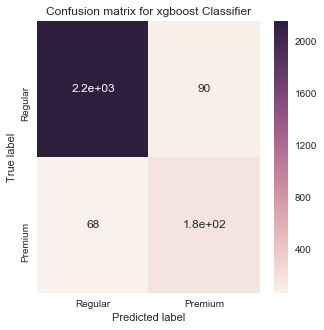

In [62]:
import seaborn as sns
plt.figure(figsize=(5,5))
dfmat = pd.DataFrame(dmat,index = ["Regular","Premium"],
                  columns = ["Regular","Premium"])
sns.heatmap(dfmat,annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for xgboost Classifier')
plt.show()

0.962335521917


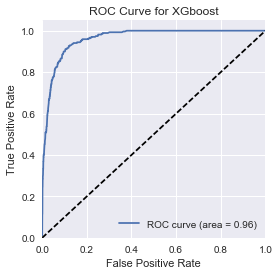

In [63]:
# we check the performance of the algorithm using the area below the ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

clf_xgb.fit(X_train, y_train)
 
# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(y_test, clf_xgb.predict_proba(X_test)[:,1])
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print(roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure(figsize=(4,4))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGboost')
plt.legend(loc="lower right")
plt.show()

In [64]:
feat_imp = clf_xgb.feature_importances_.tolist()

In [65]:
feat_imp

[0.5043029189109802, 0.4956970810890198]

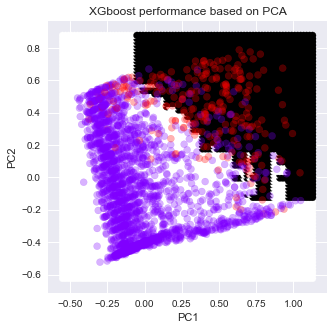

In [66]:
# comparing the prediction of the algorithm with the actual data in a grid
h = .02
x_min, x_max = X_test[:, 1].min() - 0.1, X_test[:, 1].max() + .1
y_min, y_max = X_test[:, 0].min() - .1, X_test[:, 0].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf_xgb.predict(np.c_[yy.ravel(), xx.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(5,5))
plt.scatter(xx, yy,c=Z)
plt.scatter(X_test[:,1],X_test[:,0],c=y_test,cmap="rainbow",alpha=0.3)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('XGboost performance based on PCA')
plt.show()